<a href="https://colab.research.google.com/github/KaterinaPenaloza/T1-BD3/blob/main/T1_BD3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 1**


# Descripción del Dataset

En el presente cuaderno haremos un análisis estadístico univariado, bivariado y multivariado, junto a sus respectivas hipótesis, gráficos y conclusiones acerca del dataset escogido.

El dataset que escogimos es "Pokemon", de la popular serie de videojuegos japonesa. Este nos muestra los distintos pokemon con sus tipos, puntos de vida, puntos totales, ataque, defensa, ataque especial, defensa especial, velocidad, generación a la que pertenece y si es legendario o no.

**Variables:**

* **\#:** <font color="lightblue">(int64)</font> ID de cada pokemon.
* **Name:** <font color="lightblue">(object)</font> Nombre del pokemon.
* **Type 1:** <font color="lightblue">(object)</font> Cada pokemon tiene un tipo, esto determina la debilidad/resistencia a los ataques.
* **Type 2:** <font color="lightblue">(object)</font> Algunos pokemon son duales y tienen dos tipos.
* **Total:** <font color="lightblue">(int64)</font> Suma de todas las estadísticas que vienen después de esto, sirve para guiarse y saber qué tan fuerte es un Pokémon.
* **HP:** <font color="lightblue">(int64)</font> Los puntos de vida, o salud, definen cuánto daño puede soportar un Pokémon antes de desmayarse.
* **Attack:** <font color="lightblue">(int64)</font> El modificador base para ataques normales (ej. Scratch, Punch)
* **Defense:** <font color="lightblue">(int64)</font> La resistencia base al daño contra ataques normales
* **SP Atk:** <font color="lightblue">(int64)</font> Ataque especial, el modificador base para ataques especiales  (ej. fire blast, bubble beam)
* **SP Def:** <font color="lightblue">(int64)</font> La resistencia base al daño contra ataques especiales
* **Speed:** <font color="lightblue">(int64)</font> Velocidad, determina qué Pokémon ataca primero en cada ronda.
* **Generation:** <font color="lightblue">(int64)</font> Generación a la que pertenece
* **Legendary:** <font color="lightblue">(bool)</font> True si es legendario, False si no lo es.


**Librerias:**
* **Numpy:** Biblioteca esencial para la realización de cálculos numéricos y manipulación de arreglos multidimensionales. (Utilizado para realizar Medidas de Tendencia Central)
[Documentación Numpy](https://numpy.org/doc/stable/user/index.html#user)
* **Pandas:** Herramienta fundamental para el análisis de datos que ofrece estructuras tabulares y herramientas de manipulación de datos enriquecidas. (Utilizado para realizar Diagramas de Cajas)
[Documentación Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
* **Matplot:** Librería de visualización de datos que permite crear gráficos estáticos , dinámicos con flexibilidad y control. (Utilizado para realizar Gráficos de Histograma, Circular, Densidad y Frecuencia Relativa)
[Documentación Matplotlib](https://matplotlib.org/stable/users/index)
* **Seaborn:** Librería de visualización de datos que se integra con Matplotlib , proporciona estilos , funciones simplificadas para crear gráficos informativos y atractivos. (Utilizado para realizar Matrices de Correlación y Dispersión)
[Documentación Seaborn](https://seaborn.pydata.org/tutorial.html)
* **Plotnine:** Librería de Python que permite crear gráficos estadísticos atractivos y flexibles. (Utilizado para realizar Medidas de Posición)
[Documentación Plotnine](https://plotnine.readthedocs.io/en/v0.12.3/)
* **SciPy:** Biblioteca para computación científica y análisis numérico, que incluye módulos para optimización, estadísticas, procesamiento de señales y más. (Utilizado para realizar Medidas de Correlación)
[Documentación SciPy](https://docs.scipy.org/doc/scipy/)


In [8]:
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from plotnine import *

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración warnings (vamos a ignorar los warnings)
import warnings
warnings.filterwarnings('ignore')

**Información del Dataset:**


In [9]:
# Subir el csv
from google.colab import files
uploaded = files.upload()
# Importamos el conjunto de datos y lo guardamos en la variable "datos":
datos = pd.read_csv('/content/Pokemon.csv')
datos

Saving Pokemon.csv to Pokemon (1).csv


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,902,Basculegion,Water,Ghost,530,120,112,65,80,75,78,8,False
1054,903,Sneasler,Poison,Fighting,510,80,130,60,40,80,120,8,False
1055,904,Overqwil,Dark,Poison,510,85,115,95,65,65,85,8,False
1056,905,EnamorusIncarnate Form,Fairy,Flying,580,74,115,70,135,80,106,8,True


In [10]:
#Información del dataset
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           1058 non-null   int64 
 1   Name        1058 non-null   object
 2   Type 1      1058 non-null   object
 3   Type 2      573 non-null    object
 4   Total       1058 non-null   int64 
 5   HP          1058 non-null   int64 
 6   Attack      1058 non-null   int64 
 7   Defense     1058 non-null   int64 
 8   Sp_Atk      1058 non-null   int64 
 9   Sp_Def      1058 non-null   int64 
 10  Speed       1058 non-null   int64 
 11  Generation  1058 non-null   int64 
 12  Legendary   1058 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 100.3+ KB


In [11]:
#Métricas dataset
datos.describe()

,#,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000
mean,442.706994,439.123819,69.918715,80.738185,74.531191,73.020794,72.103025,68.829868,4.075614
std,264.017092,119.457805,25.706829,32.417722,30.819330,32.666798,27.488912,30.079890,2.274858
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000
25%,212.000000,330.000000,50.000000,56.000000,50.250000,50.000000,50.000000,45.000000,2.000000
50%,440.500000,460.000000,68.000000,79.500000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,672.750000,515.000000,82.750000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,905.000000,780.000000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,8.000000


# **Apartado 1: Análisis Univariado**

Análisis estadístico univariado al conjunto de datos, el cual muestra el
comportamiento de 2 variables estudiadas por separado, en este caso, estudiaremos las variables "Attack"  y  "HP" y obtendremos sus respectivas métricas.

**Medidas de tendencia central: Media, Mediana y Moda.**

Media aritmética

In [12]:
#Media aritmética
attack_media = datos['Attack']
hp_media = datos['HP']
print("Media Aritmética Attack = ", np.mean(attack_media))
print("Media Aritmética HP = ", np.mean(hp_media))


Media Aritmética Attack =  80.73818525519849
Media Aritmética HP =  69.91871455576559


Mediana

In [13]:
#Mediana datos
print("Mediana Ataque: ", datos['Attack'].median())
print("Mediana HP: ", datos['HP'].median())

Mediana Ataque:  79.5
Mediana HP:  68.0


Moda

In [14]:
#Moda datos
lst = list(datos['Attack'])
attack_moda = max(set(lst), key=lst.count)
print("Moda Ataque: ", attack_moda)

lst = list(datos['HP'])
hp_moda = max(set(lst), key=lst.count)
print("Moda HP: ", hp_moda)

Moda Ataque:  100
Moda HP:  60


**Medidas de dispersión**

Máximo y mínimo

In [15]:
#Máximo y mínimo ataque
attack_max = int(datos['Attack'].max())
attack_min = int(datos['Attack'].min())
print("El ataque máximo es: ", attack_max, " y el ataque mínimo es: ", attack_min)
#Máximo y mínimo HP
hp_max = int(datos['HP'].max())
hp_min = int(datos['HP'].min())
print("El HP máximo es: ", hp_max, " y el HP mínimo es: ", hp_min)

El ataque máximo es:  190  y el ataque mínimo es:  5
El HP máximo es:  255  y el HP mínimo es:  1


Rango

In [16]:
#Rango
attack_rango = attack_max - attack_min
hp_rango = hp_max - hp_min
print("Rango ataque:", attack_rango)
print("Rango HP:", hp_rango)

Rango ataque: 185
Rango HP: 254


Varianza

In [17]:
#Varianza
attack_var = datos['Attack'].var()
print("Varianza de Ataque: ", attack_var)

hp_var = datos['HP'].var()
print("Varianza de HP: ", hp_var)

Varianza de Ataque:  1050.9086824178712
Varianza de HP:  660.8410685447453


Desviación estándar

In [18]:
#Desviación standar
print("Desviacion estándar ataque: ", datos['Attack'].std())
print("Desviación estándar hp: ", datos['HP'].std())

Desviacion estándar ataque:  32.41772173392003
Desviación estándar hp:  25.706829219970814


**Medidas de posición**

In [19]:
#Ordenar los datos
attack = datos['Attack']
attack_sorted = attack.sort_values()

hp = datos['HP']
hp_sorted = hp.sort_values()

Cuartil

In [20]:
cuartilAttack=datos["Attack"].quantile([0.25, 0.5, 0.75])
cuartilHP=datos["HP"].quantile([0.25, 0.5, 0.75])
print("Cuartil de Attack\n")
print(cuartilAttack,"\n")
print("Cuartil de HP\n")
print(cuartilHP, "\n")


Cuartil de Attack

0.25     56.0
0.50     79.5
0.75    100.0
Name: Attack, dtype: float64 

Cuartil de HP

0.25    50.00
0.50    68.00
0.75    82.75
Name: HP, dtype: float64 



Decil

In [21]:
decilAttack=datos["Attack"].quantile([i/10 for i in range(1, 10)])
decilHP=datos["HP"].quantile([i/10 for i in range(1, 10)])
print("Decil de Attack\n")
print(decilAttack,"\n")
print("Decil de HP\n")
print(decilHP, "\n")


Decil de Attack

0.1     40.0
0.2     52.0
0.3     60.0
0.4     70.0
0.5     79.5
0.6     85.0
0.7     95.0
0.8    107.0
0.9    125.0
Name: Attack, dtype: float64 

Decil de HP

0.1     40.0
0.2     50.0
0.3     55.0
0.4     60.0
0.5     68.0
0.6     72.0
0.7     80.0
0.8     90.0
0.9    100.0
Name: HP, dtype: float64 



Percentil

In [22]:
percentilAttack=datos["Attack"].quantile([i/100 for i in range(1, 100)])
percentilHP=datos["HP"].quantile([i/100 for i in range(1, 100)])
print("Percentil de Attack\n")
print(percentilAttack,"\n")
print("Percentil de HP\n")
print(percentilHP, "\n")


Percentil de Attack

0.01     20.00
0.02     25.00
0.03     29.71
0.04     30.00
0.05     30.00
         ...  
0.95    136.15
0.96    140.00
0.97    150.00
0.98    156.72
0.99    165.00
Name: Attack, Length: 99, dtype: float64 

Percentil de HP

0.01     25.00
0.02     30.00
0.03     33.84
0.04     35.00
0.05     38.00
         ...  
0.95    110.00
0.96    113.16
0.97    120.58
0.98    130.00
0.99    150.00
Name: HP, Length: 99, dtype: float64 



**Limpieza de datos**

Trata de variables NaN

In [23]:
# El método 'isnull()' permite detectar valores 'NaN', y, en conjunto con el método 'any()', permiten mostrar las filas que poseen dichos valores.
datos[datos.isnull().any(axis=1)]
# El método 'dropna()' permite borrar todas las columnas que posean al menos un dato 'NaN'. Esta nueva
# configuración es almacenada como un nuevo conjunto de datos llamado 'NaNdf'.
NaNdf = datos.dropna(how="any")
# Se muestra la nueva configuración de datos.
NaNdf

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1053,902,Basculegion,Water,Ghost,530,120,112,65,80,75,78,8,False
1054,903,Sneasler,Poison,Fighting,510,80,130,60,40,80,120,8,False
1055,904,Overqwil,Dark,Poison,510,85,115,95,65,65,85,8,False
1056,905,EnamorusIncarnate Form,Fairy,Flying,580,74,115,70,135,80,106,8,True


**Medidas de tendencia central: Media, Mediana y Moda con los datos tratados**

Media aritmética

In [24]:
#Media aritmética
attack_media = NaNdf['Attack']
hp_media = NaNdf['HP']
print("Media Aritmética Attack = ", np.mean(attack_media))
print("Media Aritmética HP = ", np.mean(hp_media))


Media Aritmética Attack =  85.15183246073299
Media Aritmética HP =  71.92146596858639


Mediana

In [25]:
#Mediana datos
print("Mediana Ataque: ", NaNdf['Attack'].median())
print("Mediana HP: ", NaNdf['HP'].median())

Mediana Ataque:  84.0
Mediana HP:  70.0


Moda

In [26]:
#Moda datos
lst = list(NaNdf['Attack'])
attack_moda = max(set(lst), key=lst.count)
print("Moda Ataque: ", attack_moda)

lst = list(NaNdf['HP'])
hp_moda = max(set(lst), key=lst.count)
print("Moda HP: ", hp_moda)

Moda Ataque:  90
Moda HP:  60


**Medidas de dispersión**

Máximo y mínimo

In [27]:
attack_max = int(NaNdf['Attack'].max())
attack_min = int(NaNdf['Attack'].min())
print("El ataque máximo es: ", attack_max, " y el ataque mínimo es: ", attack_min)
hp_max = int(NaNdf['HP'].max())
hp_min = int(NaNdf['HP'].min())
print("El HP máximo es: ", hp_max, " y el HP mínimo es: ", hp_min)

El ataque máximo es:  190  y el ataque mínimo es:  10
El HP máximo es:  223  y el HP mínimo es:  1


Rango

In [28]:
#Rango
attack_rango = attack_max - attack_min
hp_rango = hp_max - hp_min
print("Rango ataque:", attack_rango)
print("Rango HP:", hp_rango)

Rango ataque: 180
Rango HP: 222


Varianza

In [29]:
#Varianza
attack_var = NaNdf['Attack'].var()
print("Varianza de Ataque: ", attack_var)

hp_var = NaNdf['HP'].var()
print("Varianza de HP: ", hp_var)

Varianza de Ataque:  1096.3492842236299
Varianza de HP:  572.4151502947315


Desviación estándar

In [30]:
#Desviación standar
print("Desviacion estándar ataque: ", NaNdf['Attack'].std())
print("Desviación estándar hp: ", NaNdf['HP'].std())

Desviacion estándar ataque:  33.11116555217635
Desviación estándar hp:  23.925199064892468


**Medidas de posición**

In [31]:
#Ordenar los datos
attack = NaNdf['Attack']
attack_sorted = attack.sort_values()

hp = NaNdf['HP']
hp_sorted = hp.sort_values()

Cuartil

In [32]:
cuartilAttack=NaNdf["Attack"].quantile([0.25, 0.5, 0.75])
cuartilHP=NaNdf["HP"].quantile([0.25, 0.5, 0.75])
print("Cuartil de Attack\n")
print(cuartilAttack,"\n")
print("Cuartil de HP\n")
print(cuartilHP, "\n")

Cuartil de Attack

0.25     60.0
0.50     84.0
0.75    105.0
Name: Attack, dtype: float64 

Cuartil de HP

0.25    55.0
0.50    70.0
0.75    89.0
Name: HP, dtype: float64 



Decil

In [33]:
decilAttack=NaNdf["Attack"].quantile([i/10 for i in range(1, 10)])
decilHP=NaNdf["HP"].quantile([i/10 for i in range(1, 10)])
print("Decil de Attack\n")
print(decilAttack,"\n")
print("Decil de HP\n")
print(decilHP, "\n")

Decil de Attack

0.1     45.0
0.2     55.0
0.3     65.0
0.4     75.0
0.5     84.0
0.6     90.0
0.7    100.0
0.8    115.0
0.9    130.0
Name: Attack, dtype: float64 

Decil de HP

0.1     42.2
0.2     50.0
0.3     60.0
0.4     65.0
0.5     70.0
0.6     75.0
0.7     80.0
0.8     91.0
0.9    100.0
Name: HP, dtype: float64 



Percentil

In [34]:
percentilAttack=NaNdf["Attack"].quantile([i/100 for i in range(1, 100)])
percentilHP=NaNdf["HP"].quantile([i/100 for i in range(1, 100)])
print("Percentil de Attack\n")
print(percentilAttack,"\n")
print("Percentil de HP\n")
print(percentilHP, "\n")


Percentil de Attack

0.01     24.72
0.02     30.00
0.03     30.00
0.04     30.00
0.05     35.00
         ...  
0.95    142.00
0.96    150.00
0.97    155.00
0.98    162.24
0.99    170.00
Name: Attack, Length: 99, dtype: float64 

Percentil de HP

0.01     27.16
0.02     30.00
0.03     35.00
0.04     35.00
0.05     39.20
         ...  
0.95    110.00
0.96    110.00
0.97    119.20
0.98    125.00
0.99    137.84
Name: HP, Length: 99, dtype: float64 



##  Gráficos Univariados para Dataset Completo:

### Variable 1: Ataque

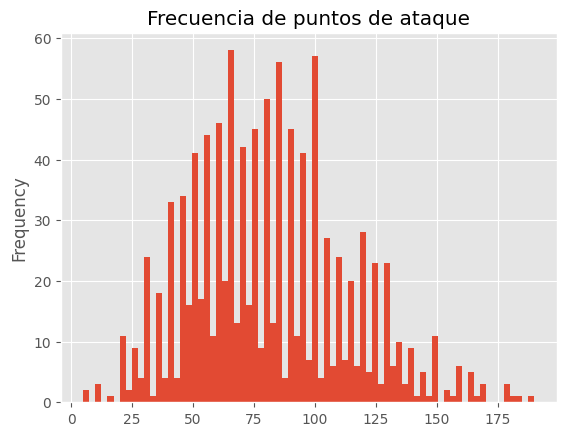

In [35]:
#Histograma: (Es un gráfico de barras pero con los límites reales, por ende, no tiene espacios entre barras)
Ataque = datos['Attack']
plot = Ataque.plot(kind='hist', title='Frecuencia de puntos de ataque', xlabel='Ataque', ylabel='Frecuencia', bins=75)

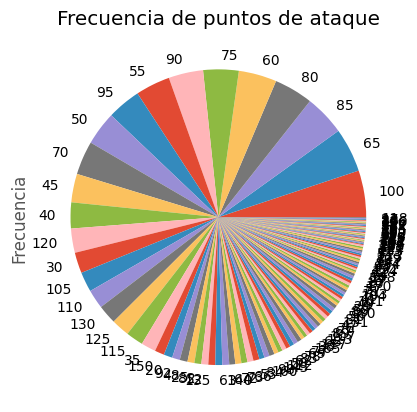

In [36]:
#Gráfico Circular:
Ataque = datos['Attack']
plot = Ataque.value_counts().plot(kind='pie', title='Frecuencia de puntos de ataque', xlabel='Ataque', ylabel='Frecuencia')

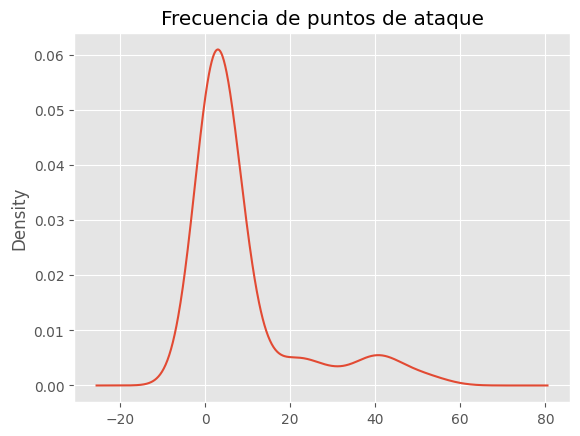

In [37]:
#Gráfico de Densidad:
Ataque = datos['Attack']
plot = Ataque.value_counts().plot(kind='kde', title='Frecuencia de puntos de ataque', xlabel='Ataque', ylabel='Frecuencia')

<Axes: xlabel='Attack', ylabel='Density'>

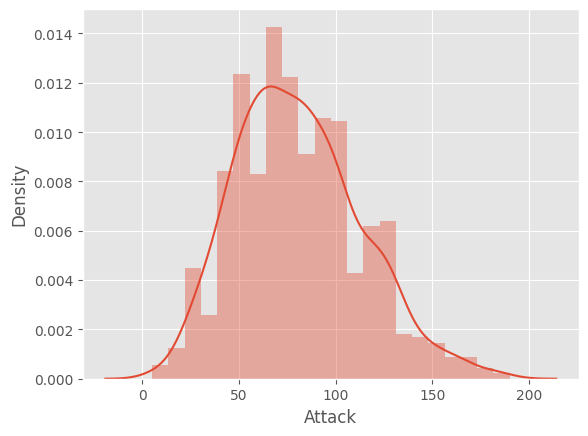

In [38]:
#Polígono de Frecuencias Relativas:
Ataque = datos['Attack']
sns.distplot(Ataque)

### Variable 2: HP

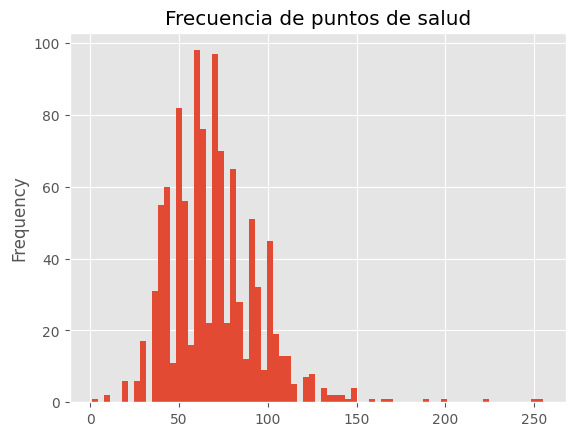

In [39]:
#Histograma: (Es un gráfico de barras pero con los límites reales, por ende, no tiene espacios entre barras)
HP = datos['HP']
plot = HP.plot(kind='hist', title='Frecuencia de puntos de salud', xlabel='Salud', ylabel='Frecuencia', bins=75)

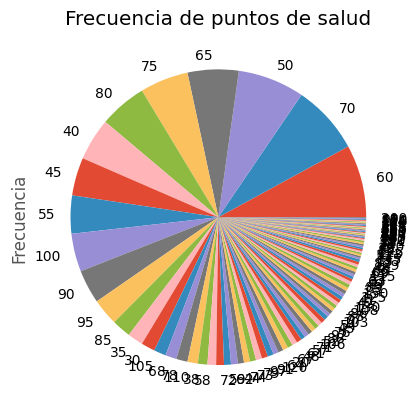

In [40]:
#Gráfico Circular:
HP = datos['HP']
plot = HP.value_counts().plot(kind='pie', title='Frecuencia de puntos de salud', xlabel='Salud', ylabel='Frecuencia')

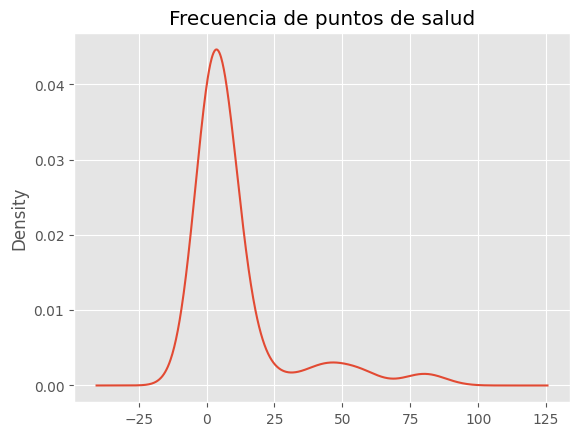

In [41]:
#Gráfico de Densidad:
HP = datos['HP']
plot = HP.value_counts().plot(kind='kde', title='Frecuencia de puntos de salud', xlabel='salud', ylabel='Frecuencia')

<Axes: xlabel='HP', ylabel='Density'>

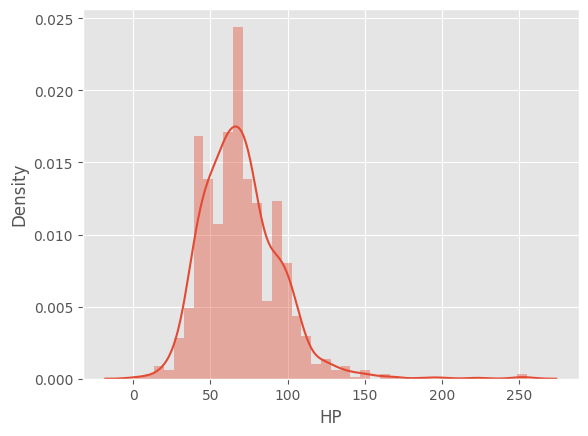

In [42]:
#Polígono de Frecuencias Relativas:
HP = datos['HP']
sns.distplot(HP)

##  Gráficos Univariados para Dataset solo con Datos Significativos (no nulos):

### Variable 1: Total

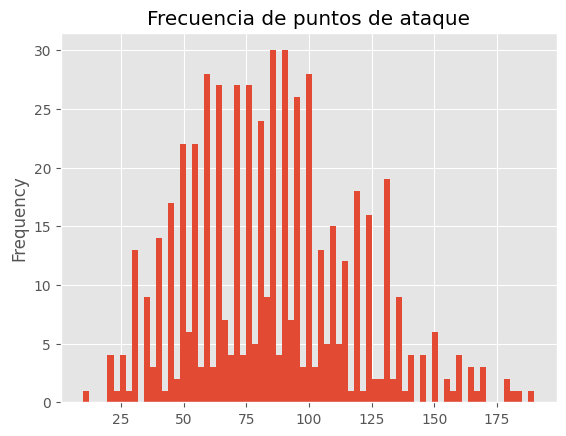

In [43]:
#Histograma: (Es un gráfico de barras pero con los límites reales, por ende, no tiene espacios entre barras)
Ataque = NaNdf['Attack']
plot = Ataque.plot(kind='hist', title='Frecuencia de puntos de ataque', xlabel='Ataque', ylabel='Frecuencia', bins=75)

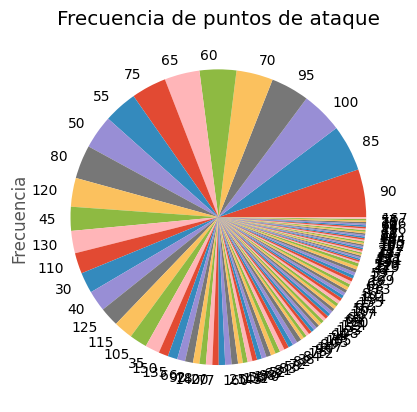

In [44]:
#Gráfico Circular:
Ataque = NaNdf['Attack']
plot = Ataque.value_counts().plot(kind='pie', title='Frecuencia de puntos de ataque', xlabel='Ataque', ylabel='Frecuencia')

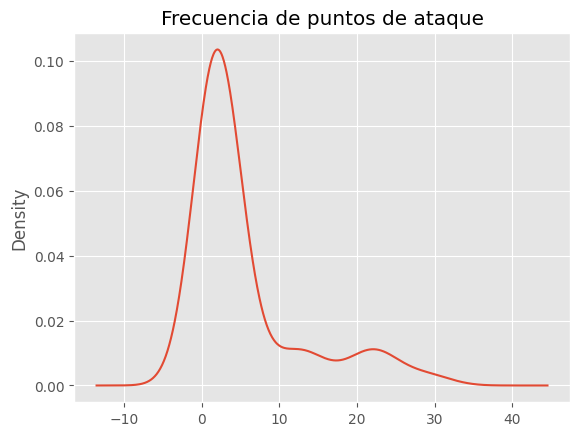

In [45]:
#Gráfico de Densidad:
Ataque = NaNdf['Attack']
plot = Ataque.value_counts().plot(kind='kde', title='Frecuencia de puntos de ataque', xlabel='Ataque', ylabel='Frecuencia')

<Axes: xlabel='Attack', ylabel='Density'>

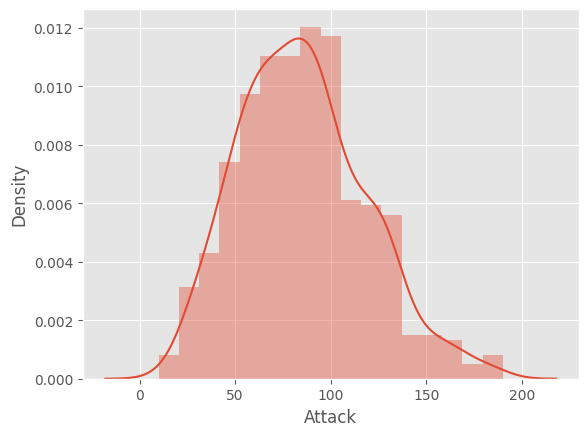

In [46]:
#Polígono de Frecuencias Relativas:
Ataque = NaNdf['Attack']
sns.distplot(Ataque)

### Variable 2: Salud

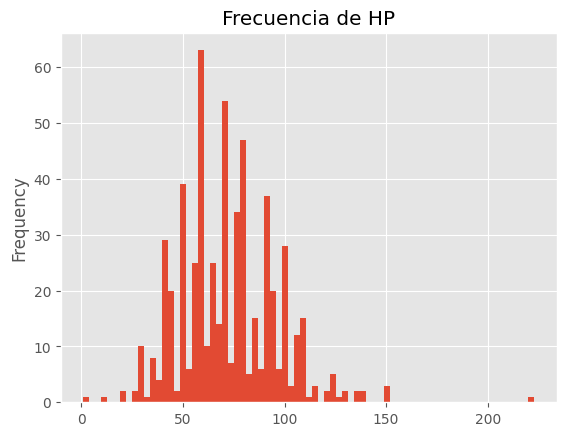

In [47]:
#Histograma: (Es un gráfico de barras pero con los límites reales, por ende, no tiene espacios entre barras)
HP = NaNdf['HP']
plot = HP.plot(kind='hist', title='Frecuencia de HP', xlabel='HP', ylabel='Frecuencia', bins=75)

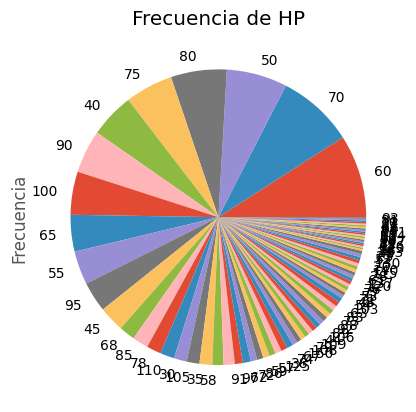

In [48]:
#Gráfico Circular:
HP = NaNdf['HP']
plot = HP.value_counts().plot(kind='pie', title='Frecuencia de HP', xlabel='HP', ylabel='Frecuencia')

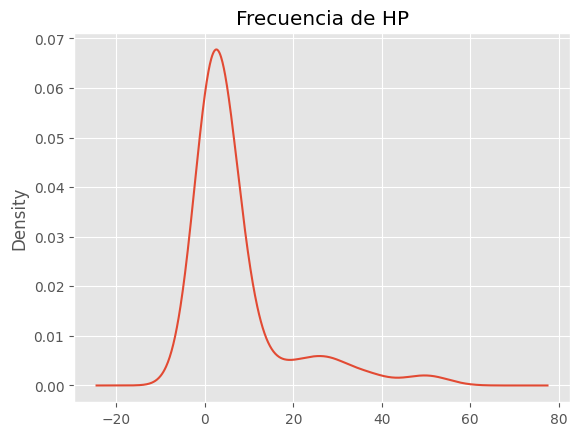

In [49]:
#Gráfico de Densidad:
HP = NaNdf['HP']
plot = HP.value_counts().plot(kind='kde', title='Frecuencia de HP', xlabel='HP', ylabel='Frecuencia')

<Axes: xlabel='HP', ylabel='Density'>

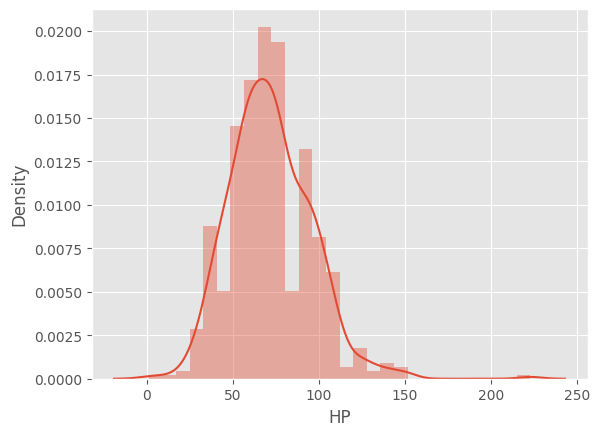

In [50]:
#Polígono de Frecuencias Relativas:
HP = NaNdf['HP']
sns.distplot(HP)

## Conclusión

En conclusión, al analizar los datos completos y los datos tratados sin variables NaN del dataset Pokemon.csv, podemos observar algunas diferencias significativas en las estadísticas de ataque (Attack) y los puntos de salud (HP).
En los datos completos, la media aritmética de Attack es de aproximadamente 80.74, mientras que en los datos tratados esta media aumenta a alrededor de 85.15. Esto sugiere que la eliminación de las variables NaN ha tenido un efecto positivo en el valor promedio de Attack. Del mismo modo, la media aritmética de HP también aumenta de alrededor de 69.92 en los datos completos a aproximadamente 71.92 en los datos tratados. Esto indica que la limpieza de datos ha mejorado la media de HP.
En cuanto a la dispersión de datos, la varianza y la desviación estándar de Attack y HP tienden a disminuir en los datos tratados en comparación con los datos completos. Esto sugiere que la eliminación de valores atípicos o NaN ha contribuido a una mayor consistencia en estas estadísticas.
Debido a lo anterior podemos decir que, la limpieza de datos parece hacer tenido un impacto positivo en las estadísticas de Attack y HP de los Pokémon, lo que indica que los datos tratados pueden ser más representativos y confiables para futuros análisis y toma de decisiones relacionadas con los Pokémon.

# **Apartado 2: Análisis Bivariado**

A continuación realizaremos un análisis bivariado para las variables Ataque especial (Sp_Atk) y Defensa especial (Sp_Def).

**Hipótesis:**

Para poner en contexto nuestra hipótesis, es necesario pensar que dentro de un videojuego lo común es que exista un balance de estadísticas para que al momento de enfrentarte a un adversario sea algo retador y gratificante, por tanto:

Nuestra hipótesis consiste en que los Pokémon con mayor Ataque especial (Sp_Atk) deberían poseer una menor Defensa especial (Sp_Def), y al igual de manera inversa. Esto, sobre todo, debería funcionar de esta forma para evitar desbalances en cada uno de los Pokémon al momento de un enfrentamiento.

In [51]:
#MEDICIONES DE CORRELACIÓN:
# Correlación de Pearson
corr_test = pearsonr(x = NaNdf['Sp_Atk'], y =  NaNdf['Sp_Def'])
print("Coeficiente de Correlación de Pearson: %.5f" % corr_test[0])

#Coeficiente de Tau de Kendall
corr, _ = kendalltau(x = NaNdf['Sp_Atk'], y =  NaNdf['Sp_Def'])
print('Coeficiente de Tau de Kendall: %.5f' % corr)

Coeficiente de Correlación de Pearson: 0.47864
Coeficiente de Tau de Kendall: 0.39470


In [52]:
#OTRAS MEDICIONES:
print("Sp_Atk")
#Media Aritmética
Sp_Atk = NaNdf['Sp_Atk']
print("Media Aritmética = ", np.mean(Sp_Atk))

#Varianza
Sp_Atk = NaNdf['Sp_Atk']
sum([(i - np.mean(Sp_Atk))**2 for i in Sp_Atk]) / (len(Sp_Atk) - 1)
varAtk = np.var(Sp_Atk, ddof=1)
print("Varianza = ", varAtk)

#-----------------------------------------

print("\nSp_Def")
#Media Aritmética
Sp_Def = NaNdf['Sp_Def']
print("Media Aritmética = ", np.mean(Sp_Def))

#Varianza
Sp_Def = NaNdf['Sp_Def']
sum([(i - np.mean(Sp_Def))**2 for i in Sp_Def]) / (len(Sp_Def) - 1)
varDef = np.var(Sp_Def, ddof=1)
print("Varianza = ", varDef)

Sp_Atk
Media Aritmética =  77.89005235602095
Varianza =  1127.5875407315198

Sp_Def
Media Aritmética =  76.09947643979058
Varianza =  749.6876395855453


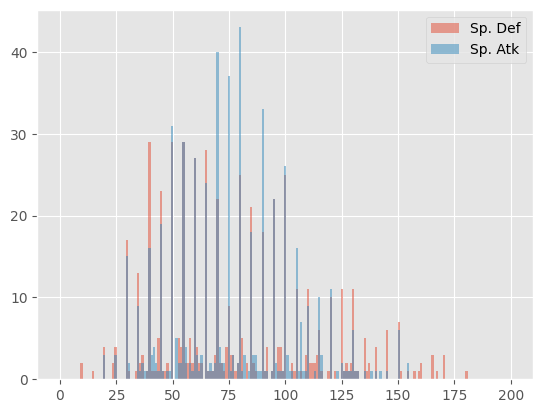

In [53]:
#Histogramas Conjuntos:
x = NaNdf['Sp_Atk']
y = NaNdf['Sp_Def']
bins = np.linspace(0, 200, 200)
plt.hist(x, bins, alpha=0.5, label='Sp. Def')
plt.hist(y, bins, alpha=0.5, label='Sp. Atk')
plt.legend(loc='upper right')
plt.show()

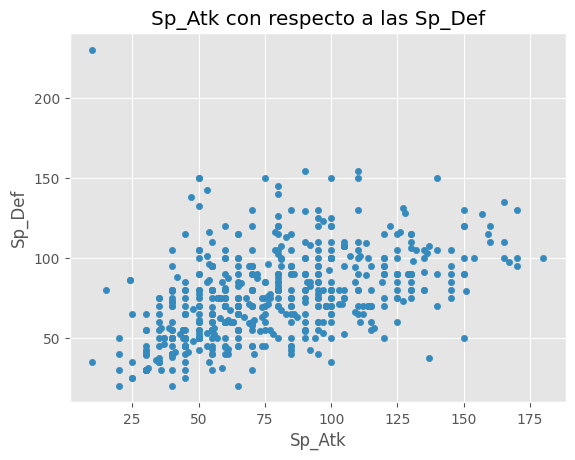

In [54]:
#Diagrama de Dispersión / Scatterplot:
plot = NaNdf[['Sp_Atk', 'Sp_Def']].plot(kind='scatter', x='Sp_Atk', y='Sp_Def', title='Sp_Atk con respecto a las Sp_Def', xlabel='Sp_Atk', ylabel='Sp_Def')

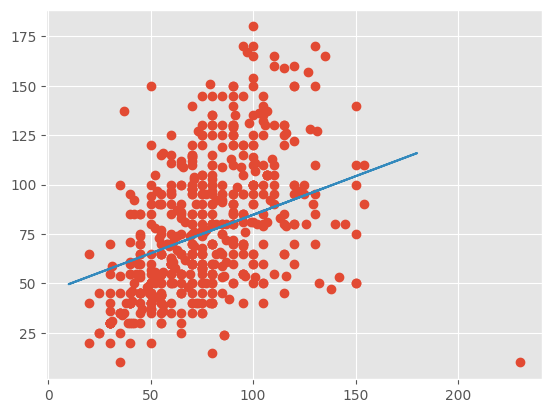

In [55]:
#Gráfico de Regresión Lineal Simple:
Sp_Atk = NaNdf['Sp_Atk']
Sp_Def = NaNdf['Sp_Def']
plt.plot(Sp_Def,Sp_Atk,'o',Sp_Atk,np.polyval(np.polyfit(Sp_Atk,Sp_Def,1),Sp_Atk),'-')

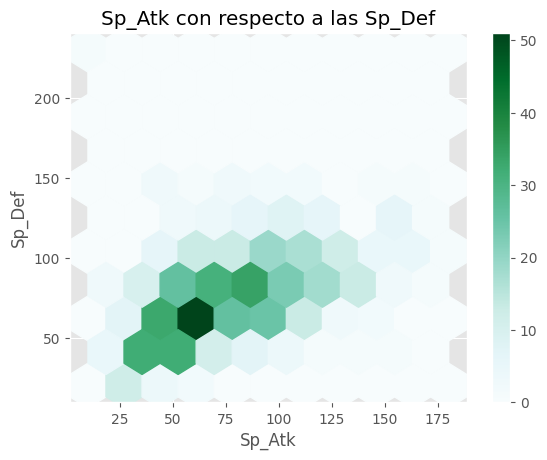

In [56]:
#Gráfico Hexbin:
plot = NaNdf.plot(kind='hexbin', x='Sp_Atk', y='Sp_Def', title='Sp_Atk con respecto a las Sp_Def', xlabel='Sp_Atk', ylabel='Sp_Def', gridsize=(10))

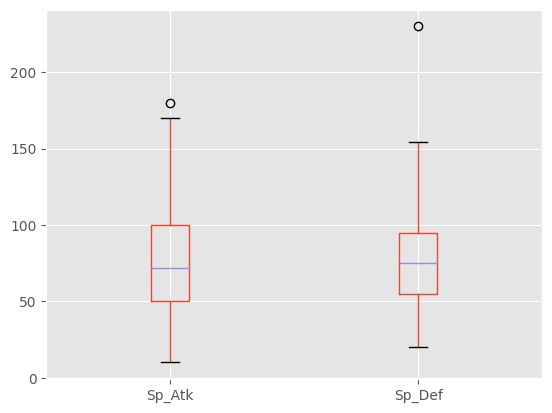

In [57]:
#Boxplot / Diagrama de Cajas
pd.DataFrame(columns=['Sp_Atk', 'Sp_Def'])
boxplot = NaNdf.boxplot(column=['Sp_Atk', 'Sp_Def'])

## Conclusión

Luego de realizar el análisis bivariado utilizando, en primer lugar, los coeficientes de correlación de Pearson y el coeficiente Tau de Kendall (para una imagen más completa de la relación entre las variables), como resultado la correlacion de estos coeficientes es de 0.5 y 0.4 respectivamente, es decir, estan directamente relacionados con un grado de fuerza media (están medianamente relacionados porque el resultado no fue 1 exactamente, pero tampoco fue 0). Tambien con el cálculo de la media aritmética podemos ver que ambas variables tienen una media similar.

Posteriormente siguiendo el análisis de gráficos, podemos observar que en el diagrama de dispersión hay una tendencia a crecer linealmente, aunque no se ve tan claramente, esto, por lo dicho anteriormente sobre la fuerza de correlación. En el gráfico de regresión lineal simple se observa que los puntos están un poco dispersos, esto puede ser porque su tendencia a lo mejor no era tan lineal como se apreciaba en el gráfico anterior o por la presencia de muchos datos atípicos, dificultando la regresión lineal.

Finalmente podemos concluir que nuestra hipótesis inicial no estaba en lo correcto, ya que según lo analizado, el ataque y la defensa especial de los pokemon tienen una relación directa, no inversa como se planteó, es decir, a mayor ataque especial, mayor es la defensa especial del pokemon.

#**Apartado 3: Análisis Multivariado**

A continuación realizaremos un análisis multivariado para las variables Ataque (Attack), Defensa (Defense) y Ataque especial (Sp_Atk).
Para este análisis nuestra hipotesis dice que existe una correlación fuerte entre estas tres variables, la cual puede influir en su rendimiento en batallas. Como dijimos en el apartado anterior, se espera que los Pokemon con un alto Ataque tengan una defensa menor.

Esta hipótesis sugiere que las estadísticas de Ataque, Defensa y Ataque especial están interrelacionadas y que su análisis conjunto puede proporcionar información valiosa sobre las estrategias y características de combate de los Pokémon.


## Análisis Multivariado:

In [58]:
# Correlación entre las variables
def tidy_corr_matrix(corr_mat):
    ''' Función para convertir una matrix de correlación de pandas en formato tidy '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['Attack','Defense','Sp_Atk',]
    corr_mat = corr_mat.loc[corr_mat['Attack'] != corr_mat['Defense'], :]
    corr_mat['abs_Sp_Atk'] = np.abs(corr_mat['Sp_Atk'])
    corr_mat = corr_mat.sort_values('abs_Sp_Atk', ascending=True)
    return(corr_mat)

corr_matrix = NaNdf[['Attack', 'Defense', 'Sp_Atk', 'Sp_Def']].select_dtypes(include=['int64']).corr(method='pearson')
tidy_corr_matrix(corr_matrix)

,Attack,Defense,Sp_Atk,abs_Sp_Atk
6,Defense,Sp_Atk,0.162841,0.162841
9,Sp_Atk,Defense,0.162841,0.162841
3,Attack,Sp_Def,0.242207,0.242207
12,Sp_Def,Attack,0.242207,0.242207
2,Attack,Sp_Atk,0.353432,0.353432
8,Sp_Atk,Attack,0.353432,0.353432
1,Attack,Defense,0.419811,0.419811
4,Defense,Attack,0.419811,0.419811
11,Sp_Atk,Sp_Def,0.478643,0.478643
14,Sp_Def,Sp_Atk,0.478643,0.478643


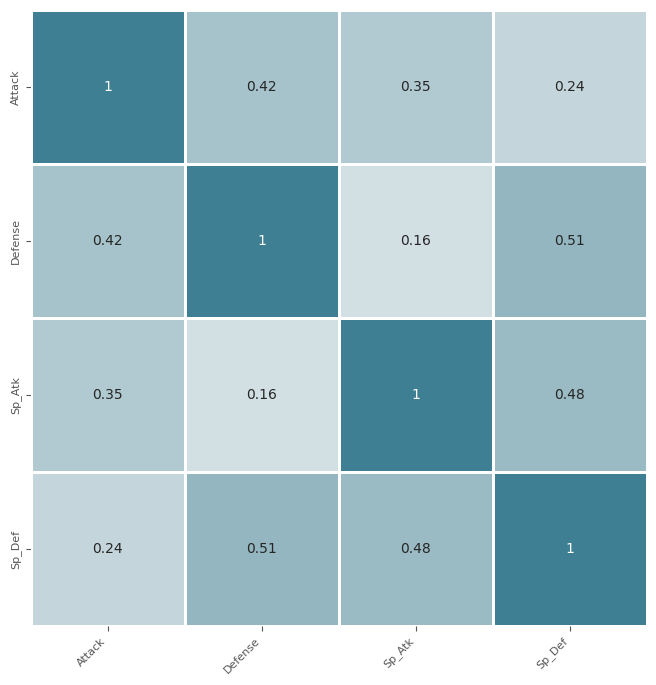

In [59]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    linewidths = 1,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 8)

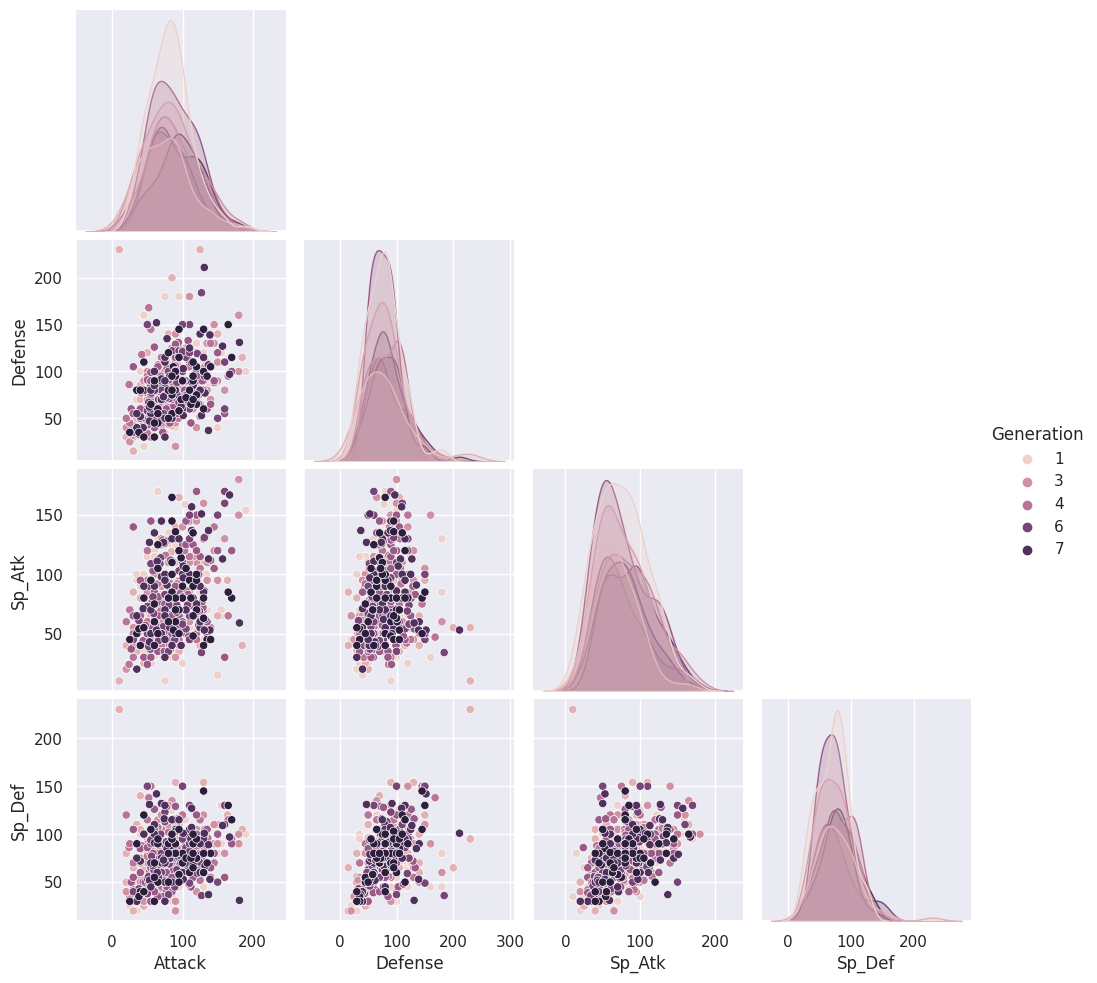

In [60]:
#Scatterplot Matrix / Matriz de Gráficos de Dispersión
sns.set_theme()
sns.pairplot(NaNdf, hue= 'Generation', corner=True, vars=['Attack','Defense', 'Sp_Atk', 'Sp_Def'])

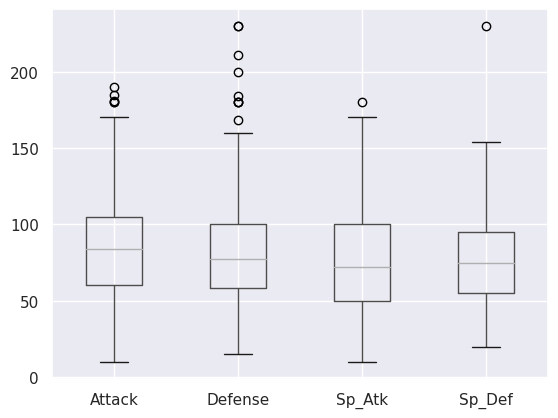

In [61]:
#Boxplot / Diagrama de Cajas
pd.DataFrame(columns=['Attack', 'Defense', 'Sp_Atk', 'Sp_Def'])
boxplot = NaNdf.boxplot(column=['Attack', 'Defense', 'Sp_Atk', 'Sp_Def'])

## Conclusión

Al realizar el análisis multivariado, comenzamos examinando la correlación entre las columnas de datos. Observamos una fuerte correlación entre las estadísticas de Defensa y Sp_Def (Defensa Especial). Sin embargo, no encontramos una dependencia significativa entre la Defensa y el Ataque Especial (Sp_Atk). Esto contribuye a mantener un equilibrio claro entre los Pokémon, casi categorizándolos en dos grupos: aquellos enfocados en el ataque y aquellos orientados a la defensa.

Para visualizar esta correlación de manera más clara, creamos una matriz gráfica en la que los tonos más oscuros representan una mayor correlación, mientras que los tonos más claros indican una correlación más baja.

Enfocándonos en la gráfica de dispersión , a medida que las generaciones han avanzado, hemos observado un aumento gradual en la correlación entre cada una de las estadísticas, siendo la Defensa y la Defensa Especial las que muestran la correlación más fuerte, especialmente a partir de la séptima generación.

Al analizar los datos mediante un diagrama de caja, notamos que hay una cantidad significativa de valores atípicos en la estadística de Defensa. Esto permite la existencia de Pokémon con una defensa excepcional, incluso superando a aquellos con un alto valor de ataque.

Para concluir, podemos afirmar que existe una correlación significativa entre la estadística de Defensa y Sp_Def (Defensa Especial), a diferencia de la relación entre la Defensa y el Ataque Especial (Sp_Atk). Esto da lugar a una clara distinción entre los Pokémon orientados hacia la defensa y los enfocados en el ataque.
